## Prepare a prediction model for profit of 50_startups data.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sfa

In [2]:
df=pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.shape

(50, 5)

### Descriptive analysis

In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### checking for data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### renaming column names

In [11]:
df=df.rename({'R&D Spend':'RnD','Administration':'admin','Marketing Spend':'marketing','State':'state','Profit':'profit'},axis=1)

In [12]:
df.head()

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### checking missing values

In [14]:
df.isnull().sum()

RnD          0
admin        0
marketing    0
state        0
profit       0
dtype: int64

In [15]:
df[df.values==0]

,RnD,admin,marketing,state,profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [17]:
print('zero values in R&D spend is',(df['RnD']==0).sum())
print('zero values in Administration is',(df['admin']==0).sum())
print('zero values in marketing spend is',(df['marketing']==0).sum())
print('zero values in profit is',(df['profit']==0).sum())

zero values in R&D spend is 2
zero values in Administration is 0
zero values in marketing spend is 3
zero values in profit is 0


### visualizing missing values

<Axes: >

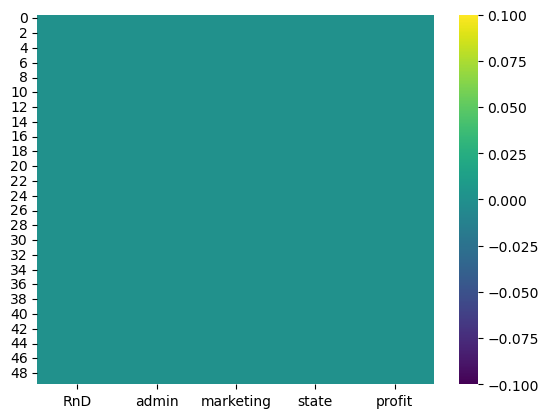

In [20]:
sns.heatmap(df.isnull(),cmap='viridis')

### checking for duplicate values

In [26]:
df[df.duplicated()].shape

(0, 5)

In [27]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [28]:
df[df.duplicated()]

,RnD,admin,marketing,state,profit


### visualizing continuous data for outlier detection

In [39]:
print('state datatype is',df.state.dtype)
print('RnD datatype is',df.RnD.dtype)
print('admin datatype is',df.admin.dtype)
print('marketing datatype is',df.marketing.dtype)
print('profit datatype is',df.profit.dtype)

state datatype is object
RnD datatype is float64
admin datatype is float64
marketing datatype is float64
profit datatype is float64


In [44]:
continuous_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print('continuous feature count {}'.format(len(continuous_feature)))

continuous feature count 4


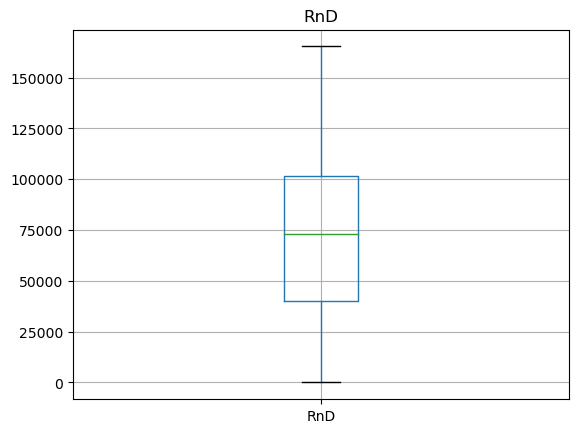

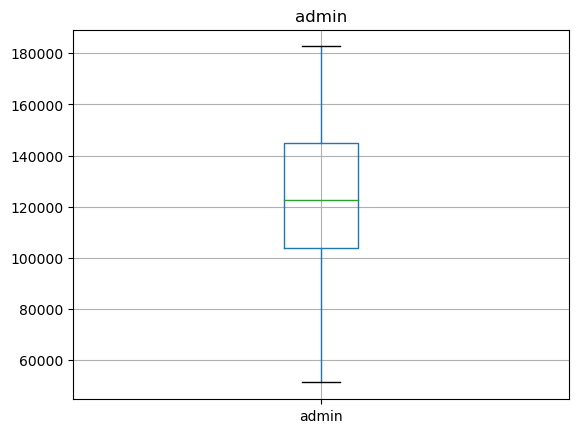

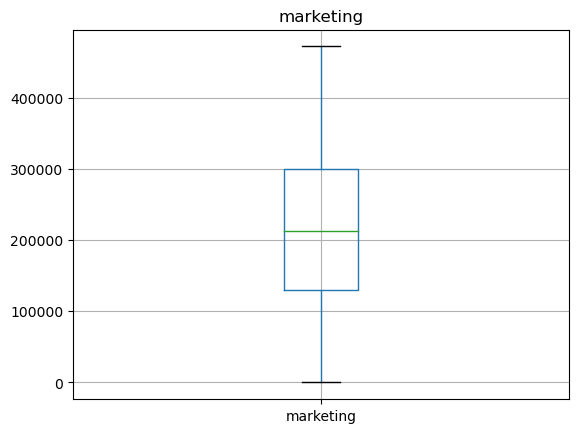

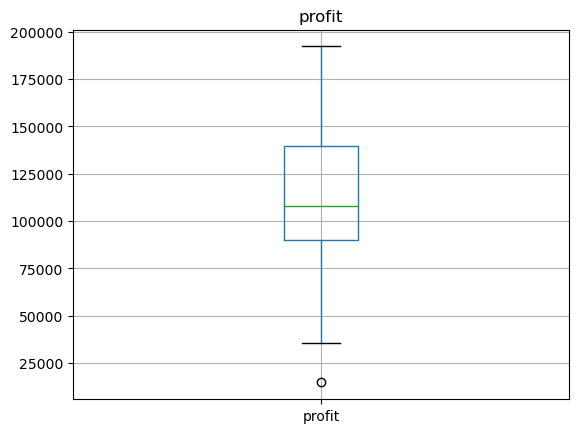

In [48]:
for feature in continuous_feature:
    df.boxplot(column=feature)
    plt.title(feature)
    plt.show()

### let's find outliers in profit

In [50]:
Q1=np.quantile(df.profit,0.25)
Q3=np.quantile(df.profit,0.75)
Q2=np.quantile(df.profit,0.50)
IQR=Q3-Q1
upper_bound=Q3+IQR*1.5
lower_bound=Q1-IQR*1.5
print('first quatile=',Q1)
print('second quatile=',Q2)
print('third quatile=',Q3)
print('Inter Quatile Range=',IQR)
print('lower whisker=',lower_bound)
print('upper whisker=',upper_bound)

first quatile= 90138.9025
second quatile= 107978.19
third quatile= 139765.97749999998
Inter Quatile Range= 49627.07499999998
lower whisker= 15698.290000000023
upper whisker= 214206.58999999997


In [59]:
outliers=df.profit[(df.profit<=15698.290000000023) |(df.profit>=214206.58999999997)]
print('outliers in profit:',outliers)

outliers in profit: 49    14681.4
Name: profit, dtype: float64


In [66]:
display(df[df.index.isin([49])],df.head())

,RnD,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,14681.4


,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### building the model to compare the values with R square

In [152]:
model=sfa.ols(formula='profit~RnD+admin+marketing',data=df)

In [153]:
model=model.fit()

In [154]:
model.rsquared, model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

### replacing outlier with median

In [93]:
data=df.copy()

<Axes: >

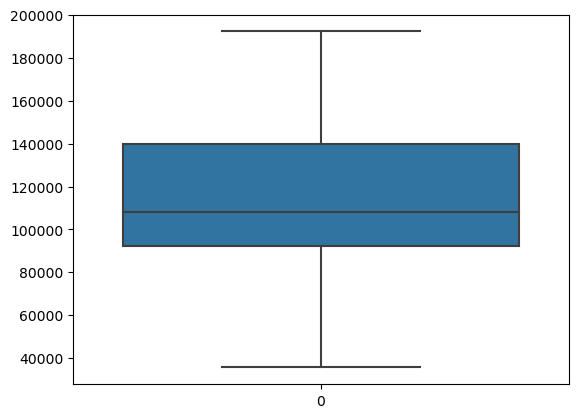

In [94]:
for i in data['profit']:
    if i>= upper_bound or i<= lower_bound:
        data['profit']=data['profit'].replace(i,np.median(df['profit']))
sns.boxplot(data['profit'])

### let's test our data in model and compare the R square with median imputation data model

In [95]:
after_median_imputation_model=sfa.ols(formula='profit~RnD+admin+marketing',data=data).fit()

In [96]:
after_median_imputation_model.rsquared,after_median_imputation_model.rsquared_adj

(0.9182958360807372, 0.91296730365122)

### replacing outlier with mean

In [97]:
data1=df.copy()

<Axes: >

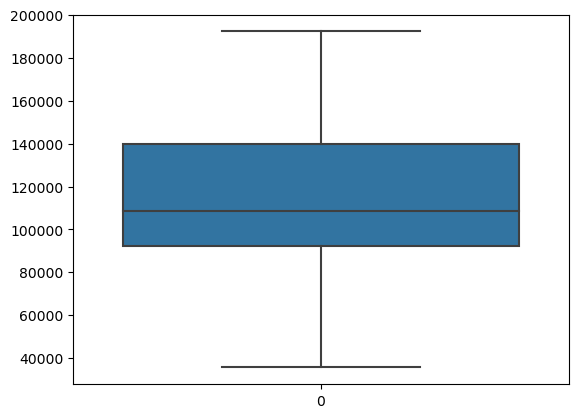

In [98]:
for i in data1['profit']:
    if i>= upper_bound or i<= lower_bound:
        data1['profit']=data1['profit'].replace(i,np.mean(df['profit']))
sns.boxplot(data1['profit'])

### let's test our data in model and compare the R square with mean imputation data model

In [99]:
after_mean_imputation_model=sfa.ols(formula='profit~RnD+admin+marketing',data=data1).fit()

In [100]:
after_mean_imputation_model.rsquared,after_mean_imputation_model.rsquared_adj

(0.9119537155310937, 0.9062115665439912)

### the best thing we can do is drop the outliers

In [102]:
no_outlier_data=df[(df['profit']>lower_bound)&(df['profit']<upper_bound)]
no_outlier_data

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


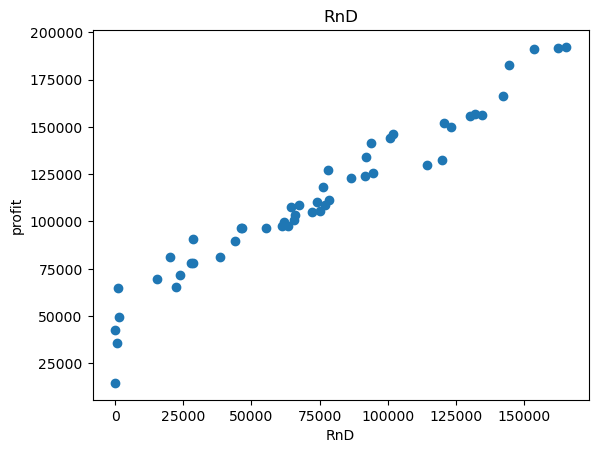

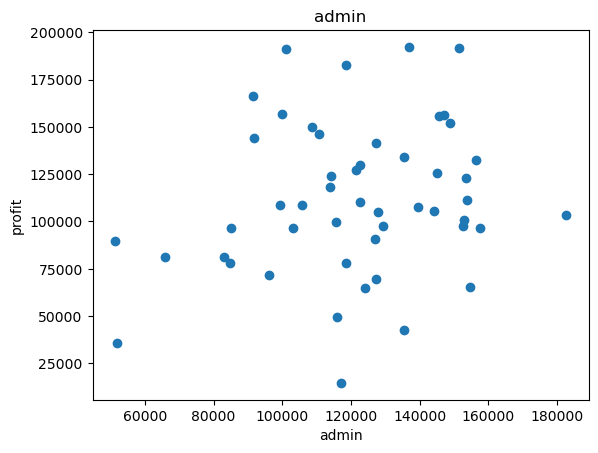

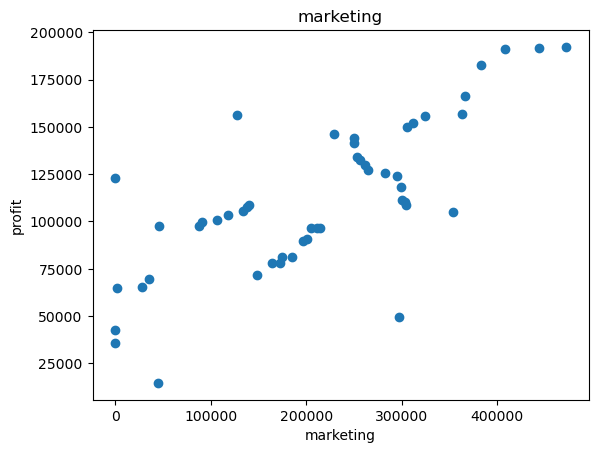

In [104]:
for feature in continuous_feature:
    if feature!='profit':
        data=df.copy()
        plt.scatter(data[feature],data['profit'])
        plt.xlabel(feature)
        plt.ylabel('profit')
        plt.title(feature)
        plt.show()

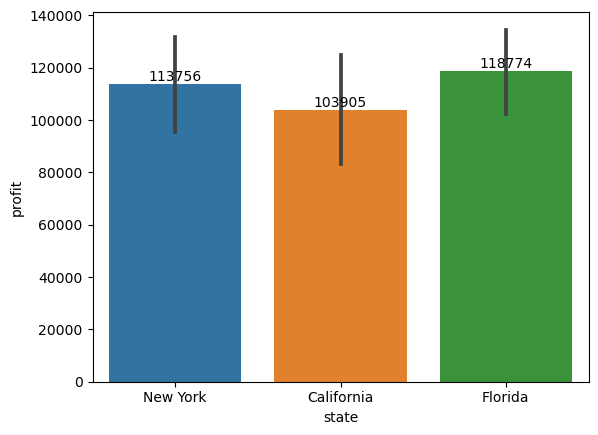

In [105]:
ax= sns.barplot(x='state',y='profit',data=df)
for i in ax.containers:
    ax.bar_label(i,)

### from observation we can say that there isn't much difference in profit of all states 

In [106]:
df4=df.drop('state',axis=1)
df4.head()

,RnD,admin,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


### checking correlation

In [108]:
correlation=df4.corr()
correlation

,RnD,admin,marketing,profit
RnD,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
marketing,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

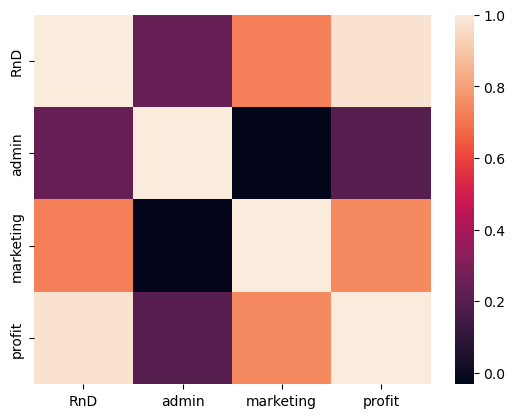

In [109]:
sns.heatmap(correlation)

C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


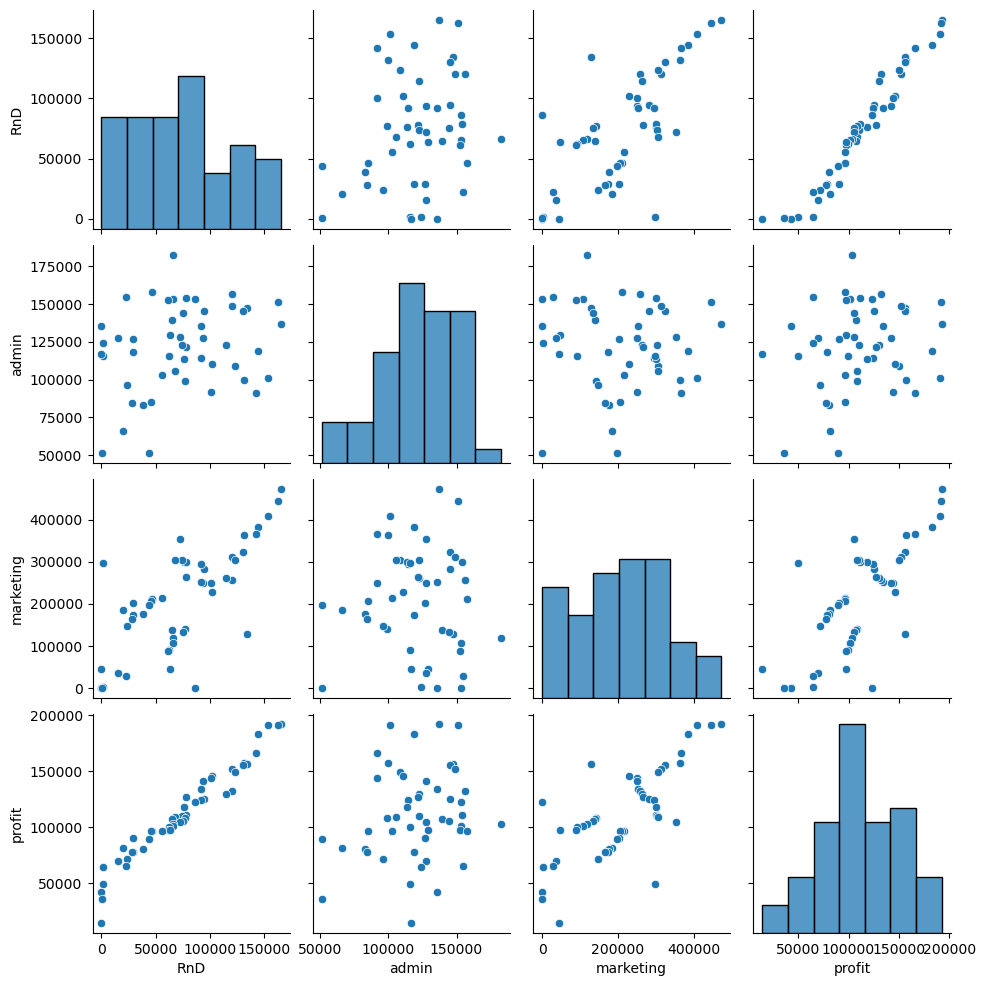

In [110]:
sns.pairplot(df4)

### feature engineering

In [111]:
from sklearn.preprocessing import StandardScaler

In [132]:
scaler=StandardScaler()

In [133]:
df5=df.copy()
features=df5[continuous_feature]

In [134]:
df5[continuous_feature] = scaler.fit_transform(features.values)
df5.head()

,RnD,admin,marketing,state,profit
0,2.016411,0.560753,2.153943,New York,2.011203
1,1.955860,1.082807,1.923600,California,1.999430
2,1.754364,-0.728257,1.626528,Florida,1.980842
3,1.554784,-0.096365,1.422210,New York,1.776627
4,1.504937,-1.079919,1.281528,Florida,1.357740


### preparing model

In [137]:
model2=sfa.ols(formula='profit~RnD+admin+marketing',data=df5).fit()

In [138]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           4.53e-30
Time:                        15:44:53   Log-Likelihood:                 4.3222
No. Observations:                  50   AIC:                           -0.6444
Df Residuals:                      46   BIC:                             7.004
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.033  -1.59e-14      1.000      -0.066       0.066
RnD            0.9176      0.051     17.846      0.000       0.814       1.021
admin         -0.0186      0.035     -0.526      0.602      -0.090       0.053
marketing      0.0826      0.050      1.655      0.105      -0.018       0.183
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### testing the model

In [141]:
model2.params

Intercept   -5.204170e-16
RnD          9.175798e-01
admin       -1.864043e-02
marketing    8.261087e-02
dtype: float64

In [142]:
model2.rsquared,model2.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [143]:
model2.tvalues,model2.pvalues

(Intercept   -1.590412e-14
 RnD          1.784637e+01
 admin       -5.255068e-01
 marketing    1.655077e+00
 dtype: float64,
 Intercept    1.000000e+00
 RnD          2.634968e-22
 admin        6.017551e-01
 marketing    1.047168e-01
 dtype: float64)

## Let's build two model in each model one of the feature will not be present and then we will come to an conclusion to remove which of the feature by comparing the model parameters


In [145]:
admin_present_model= sfa.ols('profit~RnD+admin', data= df5).fit()
admin_present_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           7.29e-31
Time:                        15:48:10   Log-Likelihood:                 2.8761
No. Observations:                  50   AIC:                            0.2478
Df Residuals:                      47   BIC:                             5.984
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.033  -1.56e-14      1.000      -0.067       0.067
RnD            0.9818      0.034     28.589      0.000       0.913       1.051
admin         -0.0368      0.034     -1.073      0.289      -0.106       0.032
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
marketing_present_model= sfa.ols('profit~RnD+marketing', data= df5).fit()
marketing_present_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           2.16e-31
Time:                        15:48:44   Log-Likelihood:                 4.1726
No. Observations:                  50   AIC:                            -2.345
Df Residuals:                      47   BIC:                             3.391
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.032   -1.6e-14      1.000      -0.065       0.065
RnD            0.9072      0.047     19.266      0.000       0.812       1.002
marketing      0.0907      0.047      1.927      0.060      -0.004       0.185
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
admin_present_model.mse_resid

0.0555181505309391

In [148]:
rmse_compare = {'Adminstration Model': np.sqrt(admin_present_model.mse_resid),'Marketing Model': np.sqrt(marketing_present_model.mse_resid)}
min(rmse_compare, key=rmse_compare.get)

'Marketing Model'

## Note: We are going to rebuild the model by dropping the Administration feature

In [150]:
final_model = sfa.ols('profit~RnD+marketing', data=df5).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           2.16e-31
Time:                        15:52:14   Log-Likelihood:                 4.1726
No. Observations:                  50   AIC:                            -2.345
Df Residuals:                      47   BIC:                             3.391
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.032   -1.6e-14      1.000      -0.065       0.065
RnD            0.9072      0.047     19.266      0.000       0.812       1.002
marketing      0.0907      0.047      1.927      0.060      -0.004       0.185
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### predicting values using final model

In [151]:
predicted = pd.DataFrame()
predicted['RnD'] = df5.RnD
predicted['marketing'] = df5.marketing
predicted['Profit'] = df5.profit
predicted['Predicted_Profit'] = pd.DataFrame(final_model.predict(predicted[['RnD','marketing']]))
predicted

,RnD,marketing,Profit,Predicted_Profit
0,2.016411,2.153943,2.011203,2.024702
1,1.955860,1.923600,1.999430,1.948870
2,1.754364,1.626528,1.980842,1.739119
3,1.554784,1.422210,1.776627,1.539524
4,1.504937,1.281528,1.357740,1.481538
5,1.279800,1.254210,1.127250,1.274819
6,1.340066,-0.688150,1.105481,1.153239
7,1.245057,0.932186,1.096210,1.214080
8,1.030369,0.830887,1.007470,1.010127
9,1.091819,0.776107,0.946022,1.060903


### Table containing R^2 value for each prepared model

In [157]:
models={'different models':['model','afer_median_imputation_model','after_mean_imputation_model','final_model'],
            'R_squared':[model.rsquared,after_median_imputation_model.rsquared,after_mean_imputation_model.rsquared,final_model.rsquared],
            'R_squared_adjusted':[model.rsquared_adj,after_median_imputation_model.rsquared_adj,after_mean_imputation_model.rsquared_adj,final_model.rsquared_adj]}

In [159]:
r2_table=pd.DataFrame(models)
r2_table

,different models,R_squared,R_squared_adjusted
0,model,0.950746,0.947534
1,afer_median_imputation_model,0.918296,0.912967
2,after_mean_imputation_model,0.911954,0.906212
3,final_model,0.950450,0.948342
